# eSports Earnings - Data Analysis

## Import necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

### Format options

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

In [3]:
plt.style.use('seaborn')

In [4]:
#plt.style.available

# 

## Load the Data

In [5]:
# Dataset: https://www.kaggle.com/jackdaoud/esports-earnings-for-players-teams-by-game

In [6]:
path = './Datasets/eSports/'

In [7]:
countries = pd.read_csv(path + 'country-and-continent-codes-list.csv')
players = pd.read_csv(path + 'highest_earning_players.csv')
teams = pd.read_csv(path + 'highest_earning_teams.csv')

# 

## Data Exploratory

In [8]:
countries.head()

,Continent_Name,Continent_Code,Country_Name,Two_Letter_Country_Code,Three_Letter_Country_Code,Country_Number
0,Asia,AS,"Afghanistan, Islamic Republic of",AF,AFG,4.00
1,Europe,EU,"Albania, Republic of",AL,ALB,8.00
2,Antarctica,AN,Antarctica (the territory South of 60 deg S),AQ,ATA,10.00
3,Africa,AF,"Algeria, People's Democratic Republic of",DZ,DZA,12.00
4,Oceania,OC,American Samoa,AS,ASM,16.00


In [9]:
countries['Country_Number'].isnull().sum()

4

In [10]:
countries[countries['Country_Number'].isnull()]

,Continent_Name,Continent_Code,Country_Name,Two_Letter_Country_Code,Three_Letter_Country_Code,Country_Number
258,Oceania,OC,Disputed Territory,XX,NaN,NaN
259,Asia,AS,Iraq-Saudi Arabia Neutral Zone,XE,NaN,NaN
260,Asia,AS,United Nations Neutral Zone,XD,NaN,NaN
261,Asia,AS,Spratly Islands,XS,NaN,NaN


In [11]:
countries.shape

(262, 6)

In [12]:
players.head()

,PlayerId,NameFirst,NameLast,CurrentHandle,CountryCode,TotalUSDPrize,Game,Genre
0,3883,Peter,Rasmussen,dupreeh,dk,"1,822,989.41",Counter-Strike: Global Offensive,First-Person Shooter
1,3679,Andreas,Højsleth,Xyp9x,dk,"1,799,288.57",Counter-Strike: Global Offensive,First-Person Shooter
2,3885,Nicolai,Reedtz,dev1ce,dk,"1,787,489.88",Counter-Strike: Global Offensive,First-Person Shooter
3,3672,Lukas,Rossander,gla1ve,dk,"1,652,350.75",Counter-Strike: Global Offensive,First-Person Shooter
4,17800,Emil,Reif,Magisk,dk,"1,416,448.64",Counter-Strike: Global Offensive,First-Person Shooter


In [13]:
players.shape

(1000, 8)

In [14]:
teams.head()

,TeamId,TeamName,TotalUSDPrize,TotalTournaments,Game,Genre
0,760,San Francisco Shock,"3,105,000.00",7,Overwatch,First-Person Shooter
1,776,London Spitfire,"1,591,136.50",13,Overwatch,First-Person Shooter
2,768,New York Excelsior,"1,572,618.50",18,Overwatch,First-Person Shooter
3,773,Philadelphia Fusion,"1,186,278.50",15,Overwatch,First-Person Shooter
4,766,Seoul Dynasty,"1,130,000.00",6,Overwatch,First-Person Shooter


In [15]:
teams.shape

(928, 6)

# 

## Data Cleaning

In [16]:
countries.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262 entries, 0 to 261
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Continent_Name             262 non-null    object 
 1   Continent_Code             219 non-null    object 
 2   Country_Name               262 non-null    object 
 3   Two_Letter_Country_Code    261 non-null    object 
 4   Three_Letter_Country_Code  258 non-null    object 
 5   Country_Number             258 non-null    float64
dtypes: float64(1), object(5)
memory usage: 83.0 KB


In [17]:
countries.memory_usage(deep=True)

Index                          128
Continent_Name               16836
Continent_Code               14297
Country_Name                 20577
Two_Letter_Country_Code      15431
Three_Letter_Country_Code    15608
Country_Number                2096
dtype: int64

#

In [18]:
players.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PlayerId       1000 non-null   int64  
 1   NameFirst      1000 non-null   object 
 2   NameLast       1000 non-null   object 
 3   CurrentHandle  1000 non-null   object 
 4   CountryCode    1000 non-null   object 
 5   TotalUSDPrize  1000 non-null   float64
 6   Game           1000 non-null   object 
 7   Genre          1000 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 405.2 KB


In [19]:
players.memory_usage(deep=True)

Index              128
PlayerId          8000
NameFirst        63973
NameLast         63382
CurrentHandle    63314
CountryCode      59000
TotalUSDPrize     8000
Game             70200
Genre            78900
dtype: int64

In [20]:
change_type = {
    'Game':'category',
    'Genre':'category'
}

players.astype(change_type).memory_usage(deep=True)

Index              128
PlayerId          8000
NameFirst        63973
NameLast         63382
CurrentHandle    63314
CountryCode      59000
TotalUSDPrize     8000
Game              2002
Genre             1550
dtype: int64

In [21]:
players = players.astype(change_type)

In [22]:
players.memory_usage(deep=True).sum() / 1024    # 263.03 KB

263.0361328125

#

In [23]:
teams.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 928 entries, 0 to 927
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   TeamId            928 non-null    int64  
 1   TeamName          928 non-null    object 
 2   TotalUSDPrize     928 non-null    float64
 3   TotalTournaments  928 non-null    int64  
 4   Game              928 non-null    object 
 5   Genre             928 non-null    object 
dtypes: float64(1), int64(2), object(3)
memory usage: 219.7 KB


In [24]:
teams.memory_usage(deep=True)

Index                 128
TeamId               7424
TeamName            64648
TotalUSDPrize        7424
TotalTournaments     7424
Game                65148
Genre               72764
dtype: int64

# 

In [25]:
countries.isnull().sum()

Continent_Name                0
Continent_Code               43
Country_Name                  0
Two_Letter_Country_Code       1
Three_Letter_Country_Code     4
Country_Number                4
dtype: int64

In [26]:
print('Missing Values (in countries DataFrame)', end='\n\n')
for col in countries.columns:
    miss_val = countries[col].isnull().mean()
    if len(str(miss_val * 100).split('.')[0]) == 1:
        print(f'[ {round(miss_val * 100, 1)}%]', col)
    else:
        print(f'[{round(miss_val * 100, 1)}%]', col)
    

Missing Values (in countries DataFrame)

[ 0.0%] Continent_Name
[16.4%] Continent_Code
[ 0.0%] Country_Name
[ 0.4%] Two_Letter_Country_Code
[ 1.5%] Three_Letter_Country_Code
[ 1.5%] Country_Number


In [27]:
countries.duplicated().sum()

0

In [28]:
players.isnull().sum()

PlayerId         0
NameFirst        0
NameLast         0
CurrentHandle    0
CountryCode      0
TotalUSDPrize    0
Game             0
Genre            0
dtype: int64

In [29]:
players.duplicated().sum()

0

In [30]:
teams.isnull().sum()

TeamId              0
TeamName            0
TotalUSDPrize       0
TotalTournaments    0
Game                0
Genre               0
dtype: int64

In [31]:
teams.duplicated().sum()

0

In [32]:
players.head()

,PlayerId,NameFirst,NameLast,CurrentHandle,CountryCode,TotalUSDPrize,Game,Genre
0,3883,Peter,Rasmussen,dupreeh,dk,"1,822,989.41",Counter-Strike: Global Offensive,First-Person Shooter
1,3679,Andreas,Højsleth,Xyp9x,dk,"1,799,288.57",Counter-Strike: Global Offensive,First-Person Shooter
2,3885,Nicolai,Reedtz,dev1ce,dk,"1,787,489.88",Counter-Strike: Global Offensive,First-Person Shooter
3,3672,Lukas,Rossander,gla1ve,dk,"1,652,350.75",Counter-Strike: Global Offensive,First-Person Shooter
4,17800,Emil,Reif,Magisk,dk,"1,416,448.64",Counter-Strike: Global Offensive,First-Person Shooter


In [33]:
players.groupby(['Genre', 'Game'])['PlayerId'].count()

Genre                            Game                            
Battle Royale                    Arena of Valor                        0
                                 Counter-Strike: Global Offensive      0
                                 Dota 2                                0
                                 Fortnite                            100
                                 Hearthstone                           0
                                 Heroes of the Storm                   0
                                 League of Legends                     0
                                 Overwatch                             0
                                 PUBG                                100
                                 Starcraft II                          0
Collectible Card Game            Arena of Valor                        0
                                 Counter-Strike: Global Offensive      0
                                 Dota 2                   

In [34]:
print('So.. we have 100 players per game!')

So.. we have 100 players per game!


# 

## Data Transformation

In [35]:
players.head()

,PlayerId,NameFirst,NameLast,CurrentHandle,CountryCode,TotalUSDPrize,Game,Genre
0,3883,Peter,Rasmussen,dupreeh,dk,"1,822,989.41",Counter-Strike: Global Offensive,First-Person Shooter
1,3679,Andreas,Højsleth,Xyp9x,dk,"1,799,288.57",Counter-Strike: Global Offensive,First-Person Shooter
2,3885,Nicolai,Reedtz,dev1ce,dk,"1,787,489.88",Counter-Strike: Global Offensive,First-Person Shooter
3,3672,Lukas,Rossander,gla1ve,dk,"1,652,350.75",Counter-Strike: Global Offensive,First-Person Shooter
4,17800,Emil,Reif,Magisk,dk,"1,416,448.64",Counter-Strike: Global Offensive,First-Person Shooter


In [36]:
players['CountryCode'].str.upper()

0      DK
1      DK
2      DK
3      DK
4      DK
       ..
995    FI
996    US
997    IT
998    US
999    SE
Name: CountryCode, Length: 1000, dtype: object

In [37]:
players['CountryCode'] = players['CountryCode'].str.upper()

# 

In [38]:
countries.head()

,Continent_Name,Continent_Code,Country_Name,Two_Letter_Country_Code,Three_Letter_Country_Code,Country_Number
0,Asia,AS,"Afghanistan, Islamic Republic of",AF,AFG,4.00
1,Europe,EU,"Albania, Republic of",AL,ALB,8.00
2,Antarctica,AN,Antarctica (the territory South of 60 deg S),AQ,ATA,10.00
3,Africa,AF,"Algeria, People's Democratic Republic of",DZ,DZA,12.00
4,Oceania,OC,American Samoa,AS,ASM,16.00


In [39]:
filtered = countries['Two_Letter_Country_Code'].notnull()     # if we don't use that filter, we will get an error about NaN values
countries[filtered]['Two_Letter_Country_Code'].apply(lambda x: x.upper())

0      AF
1      AL
2      AQ
3      DZ
4      AS
       ..
257    ZM
258    XX
259    XE
260    XD
261    XS
Name: Two_Letter_Country_Code, Length: 261, dtype: object

In [40]:
countries['Two_Letter_Country_Code'] = countries[filtered]['Two_Letter_Country_Code'].apply(lambda x: x.upper())

# 

In [41]:
merge_data = pd.merge(countries, players, left_on='Two_Letter_Country_Code', right_on='CountryCode')

In [42]:
merge_data = merge_data.loc[:, ['PlayerId', 'NameFirst', 'NameLast', 'CurrentHandle', 'TotalUSDPrize', 'Game', 'Genre','Continent_Name', 'Country_Name', 'Country_Number']]

In [43]:
merge_data.head()

,PlayerId,NameFirst,NameLast,CurrentHandle,TotalUSDPrize,Game,Genre,Continent_Name,Country_Name,Country_Number
0,61896,Thiago,Lapp,kinG,"1,021,000.00",Fortnite,Battle Royale,South America,"Argentina, Argentine Republic",32.00
1,30167,Francisco,Leimontas,PNC,"82,409.24",Hearthstone,Collectible Card Game,South America,"Argentina, Argentine Republic",32.00
2,15703,Facu,Pruzzo,Nalguidan,"70,750.00",Hearthstone,Collectible Card Game,South America,"Argentina, Argentine Republic",32.00
3,30451,Anathan,Pham,ana,"6,000,411.96",Dota 2,Multiplayer Online Battle Arena,Oceania,"Australia, Commonwealth of",36.00
4,15530,Damien,Chok,kpii,"1,809,225.30",Dota 2,Multiplayer Online Battle Arena,Oceania,"Australia, Commonwealth of",36.00


# 

## Visualization

### Top Games Graph

In [44]:
top_games = players.groupby('Game')['TotalUSDPrize'].sum().sort_values(ascending=False)

In [45]:
top_games

Game
Dota 2                             179,178,818.95
Counter-Strike: Global Offensive    56,541,920.90
Fortnite                            43,409,370.91
League of Legends                   35,043,475.87
Starcraft II                        25,379,823.93
Hearthstone                         13,335,640.79
PUBG                                12,441,958.89
Overwatch                           12,347,808.50
Heroes of the Storm                 11,780,445.24
Arena of Valor                       8,333,952.43
Name: TotalUSDPrize, dtype: float64

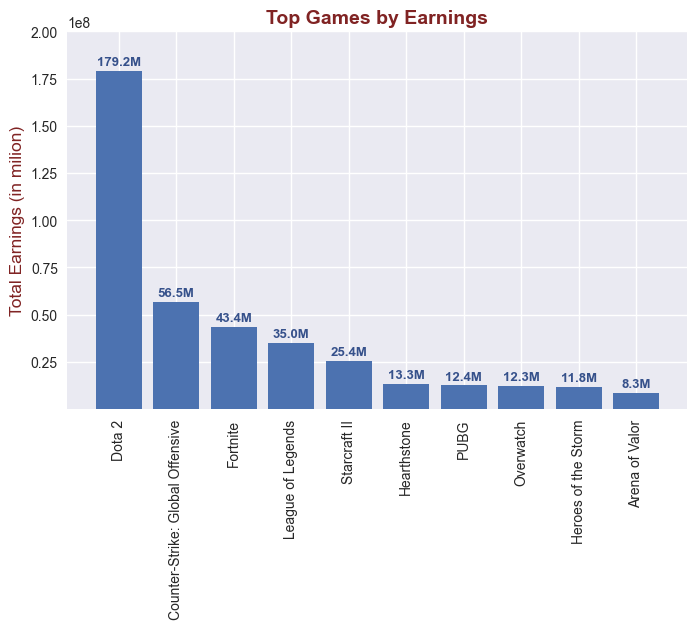

In [46]:
fig, ax = plt.subplots(figsize=(8,5), dpi=100)

plt.bar(top_games.index, top_games)


y_position = 3 * (10 ** 6)
for idx, val in enumerate(top_games):
    ax.text(idx, val + y_position, str(round(val / 10 ** 6, 1)) + 'M', ha='center', color='#36518B', fontweight='bold', fontsize=9.5)


plt.title('Top Games by Earnings', fontsize=14, color='#802323', fontweight='bold')
plt.ylabel('Total Earnings (in milion)', fontsize=12.5, color='#802323')

x = 10 ** 8    # 100,000,000
plt.yticks([0.25*x, 0.5*x, 0.75*x, 1*x, 1.25*x, 1.5*x, 1.75*x, 2*x])
plt.xticks(rotation=90)

#plt.grid(axis='y')
plt.show()

# 

### Top 10 Players (by Earnings)

In [47]:
players.head()

,PlayerId,NameFirst,NameLast,CurrentHandle,CountryCode,TotalUSDPrize,Game,Genre
0,3883,Peter,Rasmussen,dupreeh,DK,"1,822,989.41",Counter-Strike: Global Offensive,First-Person Shooter
1,3679,Andreas,Højsleth,Xyp9x,DK,"1,799,288.57",Counter-Strike: Global Offensive,First-Person Shooter
2,3885,Nicolai,Reedtz,dev1ce,DK,"1,787,489.88",Counter-Strike: Global Offensive,First-Person Shooter
3,3672,Lukas,Rossander,gla1ve,DK,"1,652,350.75",Counter-Strike: Global Offensive,First-Person Shooter
4,17800,Emil,Reif,Magisk,DK,"1,416,448.64",Counter-Strike: Global Offensive,First-Person Shooter


In [48]:
top_10_players = players.sort_values('TotalUSDPrize', ascending=False).head(10)

In [49]:
top_10_players = top_10_players.sort_values('TotalUSDPrize')

In [50]:
top_10_players

,PlayerId,NameFirst,NameLast,CurrentHandle,CountryCode,TotalUSDPrize,Game,Genre
109,12133,Lasse,Urpalainen,Matumbaman,FI,"3,765,369.04",Dota 2,Multiplayer Online Battle Arena
108,25335,Maroun,Merhej,GH,LB,"4,193,412.69",Dota 2,Multiplayer Online Battle Arena
107,12579,Ivan,Ivanov,MinD_ContRoL,BG,"4,579,118.16",Dota 2,Multiplayer Online Battle Arena
106,14671,Amer,Al-Barkawi,Miracle-,JO,"4,798,043.68",Dota 2,Multiplayer Online Battle Arena
105,3145,Kuro,Takhasomi,KuroKy,DE,"5,193,382.81",Dota 2,Multiplayer Online Battle Arena
104,18897,Topias,Taavitsainen,Topson,FI,"5,470,902.57",Dota 2,Multiplayer Online Battle Arena
103,2811,Sébastien,Debs,Ceb,FR,"5,554,297.41",Dota 2,Multiplayer Online Battle Arena
102,30451,Anathan,Pham,ana,AU,"6,000,411.96",Dota 2,Multiplayer Online Battle Arena
101,3822,Jesse,Vainikka,JerAx,FI,"6,470,000.02",Dota 2,Multiplayer Online Battle Arena
100,3304,Johan,Sundstein,N0tail,DK,"6,952,596.58",Dota 2,Multiplayer Online Battle Arena


TypeError: can only concatenate str (not "Categorical") to str

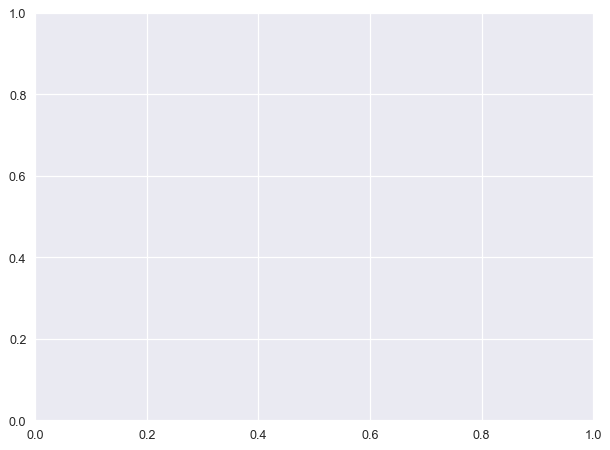

In [51]:
fig, ax = plt.subplots(figsize=(8,6), dpi=90)

plt.barh( '(' + top_10_players['Game'] + ') ' + top_10_players['CurrentHandle'], top_10_players['TotalUSDPrize'])


for idx, val in enumerate(top_10_players['TotalUSDPrize']):
    ax.text(val - 10 ** 5, idx - 0.1, str(round(val / 10 ** 6, 2)) + 'M', ha='right', fontsize=13, color='white',fontweight='bold')


plt.title('Top 10 Player by Earnings', color='#843030', fontsize=15, fontweight='bold')
plt.ylabel('(Game) Nick Name', color='#843030', fontsize=12, fontweight='bold')
plt.xlabel('Earnings (in millions)',  color='#843030', fontsize=12, fontweight='bold')

plt.show()

# 

In [ ]:
merge_data.head()

In [ ]:
earnings_by_country = merge_data.groupby('Continent_Name')['TotalUSDPrize'].sum()

In [ ]:
earnings_by_country

In [ ]:
fig, ax = plt.subplots(figsize=(5,4), dpi=100)
fig.subplots_adjust(0.3, 0, 1, 1)

plt.pie(earnings_by_country, labels=earnings_by_country.index, autopct='%.2f%%')

plt.title('Earnings by Country', color='#843030', fontsize=14, fontweight='bold')


plt.legend(loc='upper right',
           labels=['{}: ${} millions'.format(name, round(val / 10 ** 6, 2)) for name, val in zip(earnings_by_country.index, earnings_by_country)],
           bbox_to_anchor=(1.6,1),
           bbox_transform=fig.transFigure)

plt.show()

# 

### What is the proportion of earnings per genre for the top 10 games in terms of both teams and players?

In [ ]:
merge_data.head()

In [ ]:
teams.head()

In [ ]:
teams_groupedby_genre = teams.groupby('Genre')['TotalUSDPrize'].sum()

In [ ]:
teams_groupedby_genre

In [ ]:
players_groupedby_genre = players.groupby('Genre')['TotalUSDPrize'].sum()

In [ ]:
players_groupedby_genre

In [ ]:
total_earnings_by_genre = teams_groupedby_genre + players_groupedby_genre

In [ ]:
total_earnings_by_genre

In [ ]:
for idx, row in enumerate(total_earnings_by_genre):
    percent = str(round(row / total_earnings_by_genre.sum() * 100, 2)) + '%'
    
    if len(percent.split('.')[0]) == 2:
        print('[{1}] {0}'.format(total_earnings_by_genre.index[idx], percent))
    else:
        print('[ {1}] {0}'.format(total_earnings_by_genre.index[idx], percent))

# 

### Which game is most popular in terms of number of tournaments?

In [ ]:
teams.head()

In [ ]:
most_popular_game = teams.groupby('Game')['TotalTournaments'].sum().sort_values(ascending=False)

In [ ]:
most_popular_game.head(1)

# 

### Best 3 Teams by Game

In [ ]:
teams.head()

In [ ]:
bestTeamsByGame = teams.loc[:, ['Game','TeamName','TotalUSDPrize']].sort_values(['Game','TotalUSDPrize'], ascending=[True,False]).groupby('Game').head(3)

In [ ]:
bestTeamsByGame

In [ ]:
bestTeamsByGame = bestTeamsByGame.sort_values(['Game','TotalUSDPrize'], ascending=[True, False])

In [ ]:
bestTeamsByGame

In [ ]:
merge_data

In [ ]:
filtered = merge_data.loc[:, ['CurrentHandle', 'Continent_Name','TotalUSDPrize']]
hightest_player_by_continent = filtered.sort_values(['Continent_Name', 'TotalUSDPrize'], ascending=[True, False]).groupby('Continent_Name').head(5)

In [ ]:
hightest_player_by_continent = hightest_player_by_continent.sort_values(['Continent_Name', 'TotalUSDPrize'], ascending=[False, True]).set_index('Continent_Name')

In [ ]:
hightest_player_by_continent